# COMMUNICATE RESULTS TO STAKEHOLDERS

The aim of this project was to learn how to communicate effectively as  a data prefoessional with people whose data skills might not be as sharp as your own.

In project 10, you can have direct request from your manager. But many times, you will be recruited to work on multiteam projects. These projects tend to be relatively huge and:
- They usually have a project manager (someone that is responsible for overseeing the project from the start till the end).
- Because the projects are expensive, they usually require sponsors (usually high up in the hierarchy, responsible for vision and accomplishment of the project).
- Representatives of the participating teams.

These people are often referred as stakeholders. 

Sometimes in functional organization, you have to communicate with a large swath of peoople. They will have varying degrees of data litercy, which makes it harder to not only report results, but also:
- make it harder for these colleagues to request things of you.
- make it harderr for you to manage a larged and varied influx of requests. 

Here comes the scenerio: You are working for one of Google's data science team and someone from another team, specifically an account manager (a person who works for a company and its responsible for the managemnet of sales and relationships with particular customer), approaches you with a request: She wants to take a prophylactic approach and improve the revenue of undervalued apps to motivate the developers to keep working on them. As her department's budget for marketing will not allow her to invest on ads, the only way to boost the sale is by tweaking the price. She requests that you determine which paid apps are undervalued (meaning their price could be increased without lowering demand). You talk it over with your mamnager and decide to give this request a try with prototyping this project. That is making a rough analysis with some tax assumptions instead of a full-fledged analysis. Prototyping has several advantages:
- Having prototype makes it mcuh easier to estimate the cost of a fully fleshed-out project.
- Having more accurate estinate of the cost allows decision-makers not to go through with thte project if it does not seem profitable enough, or not the best allocation of resourcfes at that point in time. 
- It allows grunt workers to change and add missing requirements to complete the project. Oftentimes they are overlooked and only spotted later (missing data, creation of new database, developement of an API).
- It allows business people to tweak the project's goal.
- It gives all stakeholders an opportunity to add easily accomplishable sidegoals given the main goal, thus maximizing the project's output.

You decide that not only limit the scope of the project ( focusing on 1 goal) when prototyping, but you should also timebox it. Becasue prototyping without a deadline runs the danger of becoming time wasters that do not let you capitalize on the above advantages

We will be using the old dataset from project 1, but this time we will leverage the power of pandas. You can find the dataset [here](https://www.kaggle.com/lava18/google-play-store-apps).

## Explore the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

playstore = pd.read_csv("googleplaystore.csv")
print(playstore.shape)
playstore.head(5)

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


As previously known in prject 1, this dataset needs to be cleaned a bit by dropping row index number 10472. This attributes to a free app, which is irrelevant to our project goal with paid apps. We can just drop it without any hesitation.

In [2]:
playstore.drop(labels=10472, inplace=True)

Let's continue exploring the dataset

In [3]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


From the information gathered above, there are some columns that are not in right format. Specifically, columns named Reviews, Size and Price. 
- With the Price column: some values include $ sign, it's enough to get rid of it to get the value ready for conversion. 
- With the Size column: it contains letters like M and k, signifying memory size units.
- With the Reviews column: There are no problems with this column, the only reason why pandas did not use the proper format for this clolumn was the presence of the row that we have just deleted above. 

Meanwhile, the Type column is extra to the analysis since we already know if this app is free or not with Price column so we can consider dropping it. There are some apps appear more than one time, as already explored in project 1. We can drop these duplicates as well. 

Let's get our data cleaned!

## Clean the dataset


In [4]:
# clean the Price column
playstore["Price"] = playstore["Price"].str.replace("$", "").astype(float)
paid = playstore[playstore["Price"] != 0].copy()

# clean the Size column
def clean_size(size):
    """Convert file size string to float and megabytes"""
    size = size.replace("M","")
    if size.endswith("k"):
        size = float(size[:-1])/1000
    elif size == "Varies with device":
        size = pd.np.NaN
    else:
        size = float(size)
    return size

paid["Size"] = paid["Size"].apply(clean_size).astype(float)

# clean the Review column
paid["Reviews"].astype(int)

# drop the Type column
paid.drop("Type", axis = "columns", inplace = True)

paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 12 columns):
App               800 non-null object
Category          800 non-null object
Rating            647 non-null float64
Reviews           800 non-null object
Size              724 non-null float64
Installs          800 non-null object
Price             800 non-null float64
Content Rating    800 non-null object
Genres            800 non-null object
Last Updated      800 non-null object
Current Ver       798 non-null object
Android Ver       799 non-null object
dtypes: float64(3), object(9)
memory usage: 81.2+ KB


### Removing duplicates

Let's start by removing all repeated data points across all columns. 

In [5]:
print("Number of rows before dropping duplicates:{}".format(paid.shape[0]))
paid.drop_duplicates(inplace=True)
print("Number of rows after droppping duplicates:{}".format(paid.shape[0]))

Number of rows before dropping duplicates:800
Number of rows after droppping duplicates:765


If we just consider just the App column as the duplicate-finding criteria, we see that we still have a few duplicated apps. 

In [6]:
paid.drop_duplicates("App", inplace = True)
paid.duplicated(subset="App").sum()

0

In [7]:
#reset the index of paid: Pass True to the drop argument in order not to save the old index
paid.reset_index(inplace=True, drop=True)

Wallah, kinda done with removing duplicates task. Now when we have cleaned data, it's time to dive into some data exploration. 

## Generate data insights

Until now, we have not defined what "undervalued apps" actually means. We need to get to know the data before contempting what proxy to use to approximate the concept of "undervalued".
Since the request is centered on the price, we'll start with that column. Let's create a histogram for this column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE79F49108>]],
      dtype=object)

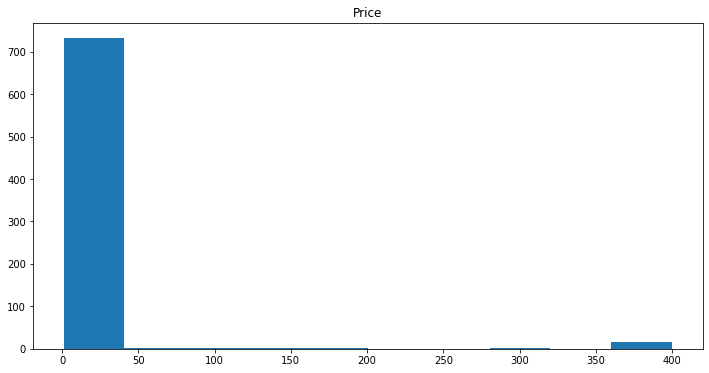

In [8]:
paid.hist(column="Price", grid=False, figsize=(12,6))

The distributions of prices is heavily skewed to the right and we have a few outliers. Let's take a closer look at the dataset.

In [9]:
paid.sort_values("Price", inplace=True, ascending=False)
paid.head(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
179,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,"10,000+",400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
320,I AM RICH PRO PLUS,FINANCE,4.0,36,41.0,"1,000+",399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
178,💎 I'm rich,LIFESTYLE,3.8,718,26.0,"10,000+",399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
318,I am Rich,FINANCE,4.3,180,3.8,"5,000+",399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
315,I am rich (Most expensive app),FINANCE,4.1,129,2.7,"1,000+",399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up


My friends, these apps above are not very niche, but they also spoil our data. Look at the price, see how disparate prices are from the others. From the histogram, the vast majority of apps have a price below $50. Let's restrict our analysis to these rows only.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE7A1A9148>]],
      dtype=object)

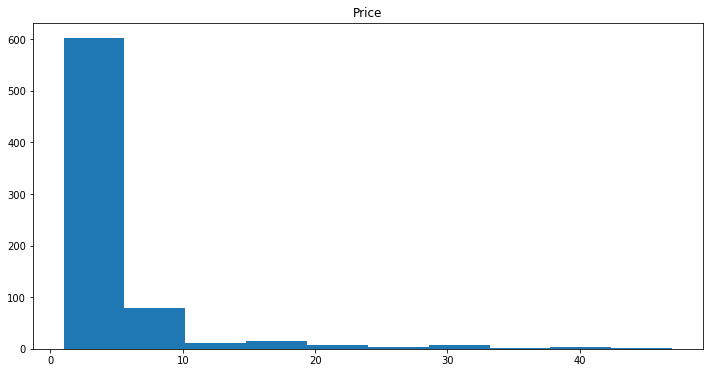

In [10]:
affordable_apps=paid[paid["Price"] <50].copy()
affordable_apps.hist("Price", grid=False, figsize=(12,6))

Even though we got rid of outliers, the histogram is still quite skewed to the right. There seems to be a clear difference between the amount of apps less than $5 and the rest. Let's explore these differences!

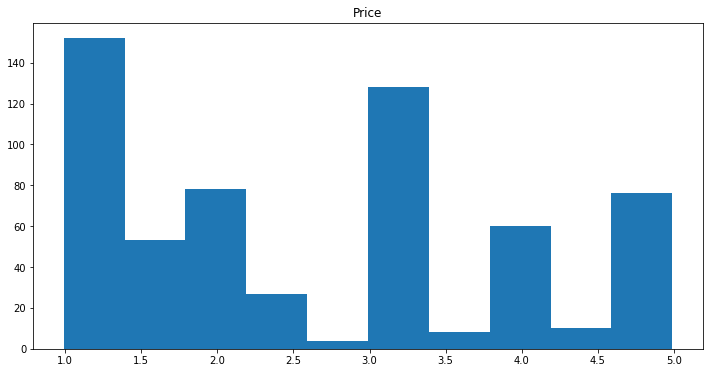

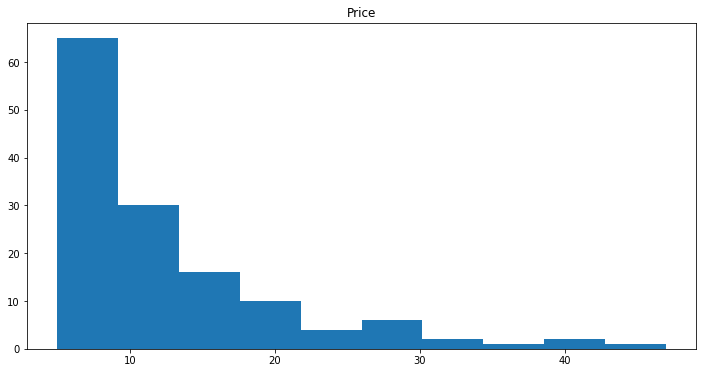

In [11]:
cheap = affordable_apps["Price"] < 5 # create a mask to identify apps cost less than $5
reasonable = affordable_apps["Price"] >= 5 # create a mask to identify apps cost $5 or more

affordable_apps[cheap].hist("Price", grid=False, figsize=(12,6))
affordable_apps[reasonable].hist("Price", grid=False, figsize=(12,6))

# create a new column in affordable_apps, have value "cheap" if price is less than $5 and "reasonable" otherwise
affordable_apps['affordability'] = affordable_apps.apply(lambda row: "cheap" if row["Price"] < 5 else "reasonable", axis=1)

The reasonable apps are still somewhat skewed, although much less so than the dataset as a whole. We will keep this in mind.
Having grasped the behaviour of the price itself. it's time to compare it to the other columns. Several columns stand out as being relevant. We'll focus on rating, category and genres. Let's first visualizing how price column relates to rating column.

### Price vs Rating

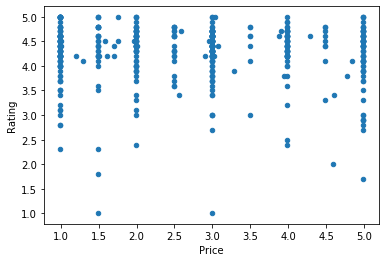

In [12]:
# visualize the relation betweem price of cheap apps in affordable_apps and theirs ratings
affordable_apps[cheap].plot(kind="scatter", x="Price", y="Rating")

Hmmm.. There seems no clear relation between price and rating for the cheap apps. Let's check the Pearson correlation coefficient, as a way to measure "how related" these columns to each other (The value will range from -1 to 1, and the closer it is to 0, the less related the variables are).

In [13]:
print(affordable_apps[cheap].corr().loc["Rating", "Price"])

-0.05593771505463082


The Pearson coefficient in this instance is around -0.06. This pose as a good news for our price tweaking strategy, since it suggests that we can change prices without it being reflected in the app's rating.
One approach: we can increase the price of those apps that cost less than the mean cheap price to mean cheap price. We would then monitor the behaviour of these apps later.

In [14]:
# find the mean price for cheap apps
cheap_mean = affordable_apps.loc[cheap, "Price"].mean() 

# for cheap apps, create a column in affordable_apps, takes 1 when app's price < 5 and 0 otherwise
affordable_apps.loc[cheap,"price_criterion"]=affordable_apps["Price"].apply(
lambda price: 1 if price < cheap_mean else 0) 
affordable_apps[cheap].head(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
711,Advanced EX for KIA,TOOLS,3.3,257,0.160,"5,000+",4.99,Everyone,Tools,"March 14, 2015",1.4,1.6 and up,cheap,0.0
712,Advanced EX for NISSAN,TOOLS,2.9,164,0.144,"5,000+",4.99,Everyone,Tools,"March 14, 2015",1.3,1.6 and up,cheap,0.0
224,Day R Premium,FAMILY,4.8,51068,57.000,"100,000+",4.99,Teen,Role Playing,"June 21, 2018",1.574,4.0.3 and up,cheap,0.0
289,AH Alarm Panel,TOOLS,3.9,7,0.081,100+,4.99,Everyone,Tools,"May 12, 2011",1.2.0,1.5 and up,cheap,0.0
286,"AG Contacts, Premium edition",COMMUNICATION,4.5,88,3.700,500+,4.99,Everyone,Communication,"May 18, 2018",8.05.18.14250,4.0.3 and up,cheap,0.0


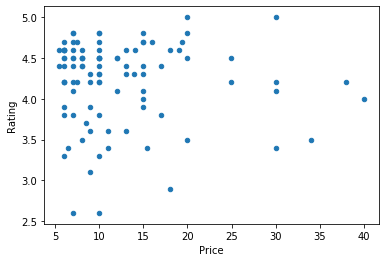

In [15]:
# visualize the relation between price of reasonable apps in affordable_apps and their ratings
affordable_apps[reasonable].plot(kind="scatter", x ="Price", y="Rating")

In [16]:
print(affordable_apps[reasonable].corr().loc["Rating", "Price"])

-0.04860964708513076


This also shows a positive sign four our price tweaking strategy.

In [17]:
# find the mean price for reasonable apps
reasonable_mean = affordable_apps.loc[reasonable, "Price"].mean() 

# for cheap apps, create a column in affordable_apps, takes 1 when app's price < 5 and 0 otherwise
affordable_apps.loc[reasonable,"price_criterion"]=affordable_apps["Price"].apply(
lambda price: 1 if price < reasonable_mean else 0) 
affordable_apps[reasonable].head(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
419,Dr.Dice - Sic bo analyzer,FAMILY,NaN,2,8.5,10+,46.99,Everyone,Entertainment,"November 5, 2016",1.0,4.0.3 and up,reasonable,0.0
115,LTC AS Legal,MEDICAL,4.0,6,1.3,100+,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up,reasonable,0.0
149,Norwegian For Kids & Babies F,FAMILY,NaN,0,14.0,5+,39.99,Everyone,Education,"September 24, 2015",1.0,4.0 and up,reasonable,0.0
312,I am Rich Person,LIFESTYLE,4.2,134,1.8,"1,000+",37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up,reasonable,0.0
112,A Manual of Acupuncture,MEDICAL,3.5,214,68.0,"1,000+",33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up,reasonable,0.0


### Price vs Category and Genres

Since we are interested to get some results for our prototyping, we'll now focus on price and category and leave other features for another time. 

#### Genres

Since affordable_apps has only around 700+ rows and the genres column can take many different values, segmenting by this column could spread our data too thin to extract any significant insights. Instead of simply ignoring it, we'll extract some information from there and see where that leaves us.

In [18]:
affordable_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
419,Dr.Dice - Sic bo analyzer,FAMILY,NaN,2,8.500,10+,46.99,Everyone,Entertainment,"November 5, 2016",1.0,4.0.3 and up,reasonable,0.0
115,LTC AS Legal,MEDICAL,4.0,6,1.300,100+,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up,reasonable,0.0
149,Norwegian For Kids & Babies F,FAMILY,NaN,0,14.000,5+,39.99,Everyone,Education,"September 24, 2015",1.0,4.0 and up,reasonable,0.0
312,I am Rich Person,LIFESTYLE,4.2,134,1.800,"1,000+",37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up,reasonable,0.0
112,A Manual of Acupuncture,MEDICAL,3.5,214,68.000,"1,000+",33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up,reasonable,0.0
695,Eu sou Rico,FINANCE,NaN,0,2.600,0+,30.99,Everyone,Finance,"January 9, 2018",1.0,4.0 and up,reasonable,0.0
77,EMT PASS,MEDICAL,3.4,51,2.400,"1,000+",29.99,Everyone,Medical,"October 22, 2014",2.0.2,4.0 and up,reasonable,0.0
109,PTA Content Master,MEDICAL,4.2,64,41.000,"1,000+",29.99,Everyone,Medical,"December 22, 2015",2.1,2.2 and up,reasonable,0.0
571,Guide to Nikon Df,PHOTOGRAPHY,NaN,1,0.663,10+,29.99,Everyone,Photography,"February 18, 2014",2.0.0,4.0.3 and up,reasonable,0.0
332,AP Art History Flashcards,FAMILY,5.0,1,96.000,10+,29.99,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up,reasonable,0.0


By looking at some values in the Genres column, we can see that 1 app can have mo 1 genre and each genre is seperated by ';'. This ';' does not belong to any specific genre. We can create a column that counts the number of genres to which each app belongs to. 

In [19]:
affordable_apps["genre_count"] = affordable_apps["Genres"].str.count(";")+1 # count the occurence of ';' plus 1 to get number of values
affordable_apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count
419,Dr.Dice - Sic bo analyzer,FAMILY,NaN,2,8.5,10+,46.99,Everyone,Entertainment,"November 5, 2016",1.0,4.0.3 and up,reasonable,0.0,1
115,LTC AS Legal,MEDICAL,4.0,6,1.3,100+,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up,reasonable,0.0,1
149,Norwegian For Kids & Babies F,FAMILY,NaN,0,14.0,5+,39.99,Everyone,Education,"September 24, 2015",1.0,4.0 and up,reasonable,0.0,1


Let's now see how the mean price varies across the number of genres!

In [20]:
# create a datagrame that stores the mean price of each segment (affordability and genre_count)
genres_mean = affordable_apps.groupby(["affordability", "genre_count"]).mean()[["Price"]]
genres_mean

Price
affordability genre_count           
cheap         1             2.507448
              2             3.155672
reasonable    1            12.574627
              2             6.823333

From the table above, we can see that in the "cheap" apps section, those has 2 genres are more expensive while it is complete opposite for "reasonable" apps section. 

For each segment, let's label the apps that cost less than their corresponding segments' mean with 1, and the others with 0.

In [21]:
def label_genres(row):

    aff = row["affordability"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < genres_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0

affordable_apps["genre_criterion"] = affordable_apps.apply(label_genres, axis="columns")
affordable_apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion
419,Dr.Dice - Sic bo analyzer,FAMILY,NaN,2,8.5,10+,46.99,Everyone,Entertainment,"November 5, 2016",1.0,4.0.3 and up,reasonable,0.0,1,0
115,LTC AS Legal,MEDICAL,4.0,6,1.3,100+,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up,reasonable,0.0,1,0
149,Norwegian For Kids & Babies F,FAMILY,NaN,0,14.0,5+,39.99,Everyone,Education,"September 24, 2015",1.0,4.0 and up,reasonable,0.0,1,0


We would then continue with the Category column with the same process as the Genres column.


#### Category

In [22]:
categories_mean = affordable_apps.groupby(["affordability", "Category"]).mean()[["Price"]]
categories_mean

Price
affordability Category                      
cheap         ART_AND_DESIGN        1.990000
              AUTO_AND_VEHICLES     1.740000
              BOOKS_AND_REFERENCE   2.529286
              BUSINESS              3.632857
              COMMUNICATION         2.428846
              DATING                3.115000
              EDUCATION             3.990000
              ENTERTAINMENT         3.990000
              FAMILY                2.754740
              FINANCE               3.490000
              FOOD_AND_DRINK        4.240000
              GAME                  2.547222
              HEALTH_AND_FITNESS    3.035455
              LIBRARIES_AND_DEMO    0.990000
              LIFESTYLE             2.895000
              MAPS_AND_NAVIGATION   1.656667
              MEDICAL               2.764286
              NEWS_AND_MAGAZINES    1.990000
              PARENTING             4.790000
              PERSONALIZATION       1.689873
              PHOTOGRAPHY           3.023571
              PRODUCTIVITY          2.635909
              SHOPPING              2.740000
              SOCIAL                0.990000
              SPORTS                2.773636
              TOOLS                 2.596056
              TRAVEL_AND_LOCAL      2.942222
              VIDEO_PLAYERS         1.490000
              WEATHER               3.240000
reasonable    AUTO_AND_VEHICLES     9.990000
              BOOKS_AND_REFERENCE   6.025714
              BUSINESS             14.967500
              COMMUNICATION        19.990000
              DATING                7.490000
              EDUCATION             5.990000
              FAMILY               15.426800
              FINANCE              21.240000
              GAME                 10.091000
              HEALTH_AND_FITNESS    7.740000
              LIFESTYLE            17.323333
              MAPS_AND_NAVIGATION  10.990000
              MEDICAL              13.805789
              PERSONALIZATION       8.490000
              PHOTOGRAPHY          15.190000
              PRODUCTIVITY          7.590000
              SOCIAL               13.990000
              SPORTS               19.490000
              TOOLS                11.847143
              TRAVEL_AND_LOCAL      7.823333
              VIDEO_PLAYERS         5.990000
              WEATHER               6.490000

In [23]:
def label_categories(row):
    aff = row["affordability"]
    cat = row["Category"]
    price = row["Price"]

    if price < categories_mean.loc[(aff, cat)][0]:
        return 1
    else:
        return 0

affordable_apps["category_criterion"] = affordable_apps.apply(label_categories, axis="columns")
affordable_apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion
419,Dr.Dice - Sic bo analyzer,FAMILY,NaN,2,8.5,10+,46.99,Everyone,Entertainment,"November 5, 2016",1.0,4.0.3 and up,reasonable,0.0,1,0,0
115,LTC AS Legal,MEDICAL,4.0,6,1.3,100+,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up,reasonable,0.0,1,0,0
149,Norwegian For Kids & Babies F,FAMILY,NaN,0,14.0,5+,39.99,Everyone,Education,"September 24, 2015",1.0,4.0 and up,reasonable,0.0,1,0,0


There you go! Now we have 3 binary criteria that aid whether or not should increase an app's price: price_criterion, genre_criterion and category_criterion. We'll use a technique called major voting, in which we decide whether an app's price should increase based in all criteria. This technique is realtively simple: sum all criterion for each application and the majority will be declared the winner. Note that since we have 3 binary criterions and 2 possible values( 1 and 0) for each criterion, ties are COMPLETELY impossible!


## Results and impact


In [24]:
criteria = ["price_criterion", "genre_criterion", "category_criterion"]
affordable_apps["Result"] = affordable_apps[criteria].mode(axis='columns')

affordable_apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result
274,ONScripter Plus (Ad Free),GAME,4.5,100,17.0,"1,000+",3.99,Everyone,Adventure,"April 7, 2016",1.2.4,4.1 and up,cheap,0.0,1,0,0,0.0
69,IBM Micromedex Drug Info,MEDICAL,3.8,206,9.5,"10,000+",2.99,Everyone,Medical,"April 25, 2018",1.17.0,4.0 and up,cheap,0.0,1,0,0,0.0
42,Steam: Rails to Riches,FAMILY,4.2,214,67.0,"5,000+",4.99,Everyone,Board;Brain Games,"December 13, 2017",3.3.1,4.1 and up,cheap,0.0,2,0,0,0.0
234,Don't Panic with Andrew J.,BOOKS_AND_REFERENCE,4.5,124,NaN,"5,000+",2.99,Everyone,Books & Reference,"August 25, 2015",Varies with device,Varies with device,cheap,0.0,1,0,0,0.0
498,CN Superstar Soccer: Goal!!!,FAMILY,4.1,3863,41.0,"100,000+",2.99,Everyone,Sports;Action & Adventure,"May 24, 2018",1.1.1,4.1 and up,cheap,0.0,2,1,0,0.0


In [25]:
# see how many apps are eligible for a price increase
nr_eligible = affordable_apps["Result"].sum()
print(nr_eligible, nr_eligible/affordable_apps.shape[0], sep="\n")

401.0
0.5470668485675307


We can see that 401 apps, which takes up around 55% of all applications in the chosen set of applications (affordable_apps), are eligible for a price increase. This is a significant number, and we consider the possibility that increasing the price for these apps will have a significant impact. 

Estimating the impact of a project is an important part of publicizing your work. Ideally, we should have data for how many times that each app was purchased, however, we don't. We can then fall back on the number of installations as a proxy for this, but unfortunately, the Installs column only gives us ranges and not exact numbers. Additionally, the lack of data makes it hard to decide what the optimal price for each app is. Instead, we'll use the mean price of affordability of the eligible apps when it is higher than the current price. 

In [26]:
# we've already estimated the mean price for cheap and reasonable apps (cheap_mean. reasonable_mean)

# set new price to apps
def new_price(row):
    if row["affordability"] == "cheap":
        return round(max(row["Price"], cheap_mean), 2)
    else:
        return round(max(row["Price"], reasonable_mean),2)

# allocate new price to new column named "New Price"
affordable_apps["New Price"] = affordable_apps.apply(new_price, axis="columns")

# modify Install column (replace some strings and change type into integer type)
affordable_apps["Installs"]=affordable_apps["Installs"].str.replace("[+,]", "").astype(int)

# create a new column to see the changes in installations of changing price 
affordable_apps["Impact"] = (affordable_apps["New Price"]-affordable_apps["Price"])*affordable_apps["Installs"]

# see the total gain/loss when increasing prices of eligible apps
total_impact = affordable_apps["Impact"].sum()

print(total_impact)

115441618.97999999


Our result is $115 million. Above number is the minimum estimated impact since the number of installations represents the low end of the range (it's not the actual number of installation). And obviously, this is too optimistic. Especially when it comes to situation that people just download and use the free version and decide not to purchase further (often the case). 

Well, we fell short on evaluating the impact due to lack of data. A possible next step would be request data concerning the number of purchases. 

## Conclusion 

Let's make a summary for our work that we can use for a presentation.

#### Data quality

We found 1 erroneuos data point which was not relevant to our goal of this project, so we decided to ignore it. We should monitor this if management decides to move forward with the project to make sure it does not become an issue later on.

We also found some duplicates but they were easy to handle from the beginning, let's say to reduce of risk of them causing troubles later.

#### Apps Prices

Since the main goal of this project is to find undervalued apps, price is the central theme through which our analysis would resolve around. As a whole, the distribution of prices among apps is tremendously right-skewed. The vast majority of apps costs less than 50 dollars with some outliers. Hence, we removed the outliers and focused on apps cost less than 50 dollars. We ended up with a little over 700 data points. Among these data points, the distribution of prices was still right-skewed with the majority falls under 5 dollars. So we decided to separate the apps into 2 different groups: (those cost less than 5 dollars: cheap apps) and (those are 5 dollars and above: reasonable apps). We called this feature "Affordability".

#### Strategy

In order to limit the scope of this prototype, we included only 4 more features in our analysis: ratings, affordability, genres and categories.

We broke down data into price groups and broke those down according to category and genre to determinr the candidates for application's price increase.

#### Price vs. Other Features:

We found out that there isn't any meaningful relationship between the price and the rating. 

As for the genres, since each app can belong to several genres, and given that we only have about 700 rows of data, we decided not to dig down into the genres as segmenting by this column could spread our data too thin to extract any significant insights. Instead we limit our analysis to counting the number of genres for each app and computing the average. 

We noticed that cheap apps with multiple genres cost more than cheap apps with a single genre. Quite the opposite for reasonaable apps. We decided that those apps that cost less than the average are eligible for price increase. 

The similar strategy applied to categories: We computed the average for each category and cast the vote in analogous way.

#### Results and impact

Upon casting the votes and finding the majority, out of 733 apps that were analyzed, 401 apps (55%) were deemed eligible for a price increase. 

To estimate the impact of increasing the price of these eligible apps, we want to find the optimal price and have a sense of how many times each app will be purchased. It is not the goal of this prototype to find optimal price, so we used the average price for each app's affordability as a quick proxy.  As for the amount of times each app will be purchased, we don't have access to the data, so we tried to use the number of installations instead. However, this proxy turned out to be unrealistic and inaccurate, so we failed to estimate the impact with the given data. In any case, given that roughly 60% of apps seem to be undervalued, our recommendation is that we move forward with this project. Here are a few options going forward.

#### Next steps

- Included unused data in analysis.
- Get more data: more features (e.g: number of times each app was purchased), more data points.
- Select a sample of the eligible apps, increase their price and monitor the behaviour of purchases. 
- Determine optimal prices for each app.
